## 신경망의 구조
* 신경망 훈련 요소
    * **네트워크(또는 모델)**를 구성하는 **층**
    * **입력 데이터**와 그데 상응하는 **타깃**
    * 학습에 사용할 피드백 신호를 정의하는 **손실 함수**
    * 학습 진행 방식을 결정하는 **옵티마이저**

### 층: 딥러닝의 구성 단위
* **층**은 하나 이상의 텐서를 입력으로 받아 하나 이성의 텐서를 출력하는 데이터 처리 모듈.
* **가중치**는 확률적 경사 하강법에 의해 학습되는 하나 이성의 텐서이며 여기에 네트워크가 학습한 **지식**이 담겨 있다.
----
* 층마다 적절한 텐서 포맷과 데이터 처리 방식이 다르다.
* (samples, features) 크기의 2D 텐서가 저장된 간단한 벡터 데이터는 **완전 연결 층(fully connected layer)**이나 **밀집 층(dense layer)**라고도 불리는 **밀집 연결 층(densely connected layer)**에 의해 처리되는 경우가 많다.
* (samples, timesteps, features) 크기의 3D 텐서로 저장된 시퀀스 데이터는 보통 LSTM 같은 **순환 층(recurrent layer)**에 의해 처리된다.
* 4D 텐서로 저장되어 있는 이미지 데이터는 일반적으로 2D **합성곱 층(convolution layer)**에 의해 처리된다.

### 모델: 층의 네트워크
* 딥러닝 모델은 층으로 만든 비순환 유향 그래프(Directed Acyclic Graph, DAG)이다.
* 다양한 네트워크 구조
    * 가지(branch)가 2개인 네트워크
    * 출력이 여러 개인 네트워크
    * 인셉션(Inception) 블록
----
* 네트워크 구조는 **가설 공간(hypothesis space)**을 정의한다.
* 네트워크 구조를 선택함으로써 **가능성 있는 공간(가셜 공간)**을 입력 데이터세어 출력 데이터로 매핑하는 일련의 특정 텐서 연산으로 제한.
* 우리가 찾아야 할 것은 이런 텐서 연산에 포함된 가중치 텐서의 좋은 값.

### 손실 함수와 옵티마이저: 학습 과정을 조절하는 열쇠
* 네트워크 구조를 정의하고 나면 두 가지를 더 선택해야 한다.
    * **손실 함수(loss function)(목적 함수(objective function))**: 훈련하는 동안 최소화될 값.
    * **옵티마이저(optimizer)**: 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정. 특정 종류의 확률적 경사 하강법(SGD)을 구현.
* 여러 개의 출력을 내는 신경망은 여러 개의 손실 함수를 가질 수 있다. (출력당 하나씩).
* 하지만 경사 하강법 과정은 하나의 스칼라 손실 값을 기준으로 한다.
* 따라서 손실이 여러 개인 네트워크에서는 모든 손실이 (평균을 내서) 하나의 스칼라 양으로 합쳐진다.
----
* 문제에 맞는 올바른 목적 함수를 선택하는 것은 아주 중요하다.
* 네트워크가 손실을 최소화하기 위해 편법을 사용할 수 있기 때문이다.

## 케라스 소개
* 케라스 특징
    * 동일한 코드로 CPU와 GPU에서 실행할 수 있다.
    * 사용하기 쉬운 API를 가지고 있어 립러닝 모델의 프로토타입을 빠르게 만들 수 있다.
    * (컴퓨터 비전을 위한) 합성곱 신경망, (시퀀스 처리를 위한) 순환 신경망을 지원하며 이 둘을 자유롭게 조합하여 사용할 수 있다.
    * 다중 입력이나 다중 출력 모델, 층의 공유, 모델 공유 등 어떤 네트워크 구조도 만들 수 있다. => 적대적 생성 신경망(Generative Adversarial Network, GAN)부터 뉴럴 튜링 머신(Neural Turing Machine)까지 케라스는 기본적으로 어떤 딥러닝 모델에도 적합하다는 뜻.

### 케라스, 텐서플로, 씨아노, CNTK
* 케라스는 딥러닝 모델을 만들기 위한 고수준의 구성 요소를 제공하는 모델 수준의 라이브러리이다.
* 텐서 조작이나 미분 같은 저수준의 연산을 다르지 않는다.
* 케라스의 **백엔드 엔진(backend engine)**에서 제공하는 최적화되고 특화된 텐서 라이브러리를 사용한다.
---
* 케라스로 작성한 모든 코드는 아무런 변경 없이 이런 백엔드 중 하나를 선택해서 실행시킬 수 있다.

### 케라스를 사용한 개발: 빠르게 둘러보기
* 전형적인 케라스 작업 흐름
    1. 입력 텐서와 타깃 텐서로 이루어진 훈련 데이터를 정의
    2. 입력과 타깃을 매핑하는 층으로 이루어진 네트워크(또는 모델)를 정의한다.
    3. 손실 함수, 옵티마이저, 모니터링하기 위한 측정 지표를 선택하여 학습 과정을 설정.
    4. 훈련 데이터에 대해 모델의 `fit()` 메서드를 반복적으로 호출한다.
* 모델을 정의하는 방법
    * `Sequential` 클래스(가장 자주 사용하는 구조인 층을 순서대로 쌓아 올린 네트워크)
    * **함수형 API**(완전히 임의의 구조를 만들 수 있는 비순환 유향 그래프 만든다.)
* `Sequential` 클래스를 사용하여 정의한 2개의 층으로 된 모델
    ```
    from keras import models
    from keras import layers

    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
    model.add(layers.Dense(10, activation='softmax'))
    ```
* 함수형 API를 사용
    ```
    input_tensor = layers.Input(shape=(784,))
    x = layers.Dense(32, activation='relu')(input_tensor)
    output_tensor = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=input_tensor, outputs=output_tensor)
    ```
* 모델 구조가 정의된 후에는 `Sequential` 모델을 사용했는지 함수형 API를 사용했는지는 상관없다.
---
* 컴파일 단계에서 학습 과정이 설정된다.
* 모델이 사용할 옵티마이저와 손실 함수, 훈련하는 동안 모니터링하기 위해 필요한 측정 지표 지정.
    ```
    from keras import optimizers

    model.compile(
        optimizer=optimizers.RMSprop(lr=0.001),
        loss='mse',
        metrics=['accuracy']
    )
    ```
---
* 입력 데이터의 넘파이 배열을 (그리고 이에 상응하는 타깃 데이터를) 모델의 `fit()` 메서드에 전달함으로써 학습 과정이 이루어진다.
    * `model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)`

## 영화 리뷰 분류: 이진 분류 예제
### IMDB 데이터셋

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 데이터 준비
* 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환한다. 그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용한다.
* 리스트를 원-핫 인코딩(one-hot encoding)하여 0과 1의 벡터로 변환한다. 예를 들어 시퀀스 `[3, 5]`를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환한다. 그다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense 층을 신경망의 첫 번째 층으로 사용.

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [8]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 신경망 모델 만들기
* 입력 데이터가 벡터고 레이블은 스칼라(1 또는 0) 이다.
* 이런 문제에 잘 작동하는 네트워크 종류는 `relu` 활성화 함수를 사용한 완전 연결 층을 그냥 쌓은 것이다.
---
* `Dense` 층에 전달한 매개변수는 **은닉 유닛**(hidden unit)의 개수
* 하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 된다.
* `output = relu(dot(W, input) + b)`
* 표현 공간의 차원을 '신경망이 내채된 표현을 학습할 때 가질 수 있는 자유도'로 이해할 수 있다.
* 은닉 유닛을 늘리면(표현 공간을 더 고차원으로 만들면) 신경망이 더욱 복잡한 표현을 학습할 수 있지만 계산 비용이 커지고 원하지 않는 패턴을 학습할 수도 있다.
* Dense 층을 쌓을 때 두 가지 중요한 구조상의 결정이 필요하다.
    * 얼마나 많은 층을 사용할 것인가?
    * 각 층에 얼마나 많은 은닉 유닛을 둘 것인가?
---
* 16개의 은닉 유닛을 가진 2개의 은닉 층
* 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

* relu와 같은 활성화 함수(또는 비선형성(non-linearity))가 없다면 Dense 층은 선형적인 연산인 점곱과 덧셈 2개로 구성된다.
* `output = dot(W, input) + b`
* 그러므로 이 층은 입력에 대한 선형 변환(아핀 변환)만을 학습할 수 있다.
* 이 층의 가설 공간은 입력 데이터를 16차원의 공간으로 바꾸는 가능한 모든 선형 변환의 집합이다.
* 이런 가설 공간은 매우 제약이 많으며, 선형 층을 깊게 쌓아도 여전히 하나의 선형 연산이기 때문에 층을 여러 개로 구성하는 장점이 없다.
* 가성 공간을 풍부하게 만들어 층을 깊게 만드는 장점을 살리기 위해서는 비선형성 또는 활성화 함수를 추가해야 한다.
* relu는 딥러닝에서 가장 인기 있는 활성화 함수이다. 

* 마지막으로 손실 함수와 옵티마이저를 선택해야 한다.
* 이진 분류 문제고 신경망의 출력이 확률이기 때문에(네트워크의 끝에 시그모이드 활성화 함수를 사용한 하나의 유닛으로 된 층을 놓았다.)
* binary_crossentropy 손실이 적합하다.
* **크로스엔트로피(Crossentropy)**는 정보 이론(Information Theory) 분야에서 온 개념으로 확률 분포 간의 차이를 측정.

In [13]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

* 케라스에 rmsprop, binary_crossentropy, accuracy가 포함되어 있기 때문에 옵티마이저, 손실 함수, 측정 지표를 문자열로 지정하는 것이 가능하다.
* 이따금 옵티마이저의 매개변수를 바꾸거나 자신만의 손실 함수, 측정 함수를 전달해야 할 경우가 있다.
* 전자의 경우에는 옵티마이저 파이썬 클래스를 사용해서 객체를 직접 만들어 optimizer 매개변수에 전달하면 된다.
* 후자의 경우는 loss와 metrics 개매변수에 함수 객체를 전달하면 된다.

In [15]:
from keras import optimizers

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

c:\Users\posky\anaconda3\envs\tf20\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [16]:
from keras import losses
from keras import metrics

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

c:\Users\posky\anaconda3\envs\tf20\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### 훈련 검증

In [17]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 3s 28ms/step - loss: 0.4966 - acc: 0.7983 - val_loss: 0.3936 - val_acc: 0.8493
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2969 - acc: 0.9021 - val_loss: 0.3019 - val_acc: 0.8850
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2184 - acc: 0.9277 - val_loss: 0.2761 - val_acc: 0.8927
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1693 - acc: 0.9437 - val_loss: 0.3074 - val_acc: 0.8743
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1358 - acc: 0.9565 - val_loss: 0.3030 - val_acc: 0.8832
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1111 - acc: 0.9652 - val_loss: 0.2957 - val_acc: 0.8859
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0943 - acc: 0.9725 - val_loss: 0.3231 - val_acc: 0.8820
Epoch 8/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0771 - a

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

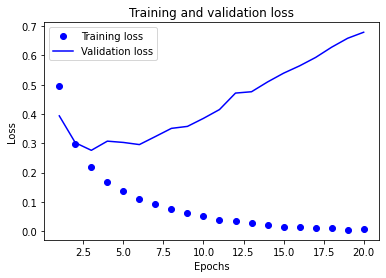

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

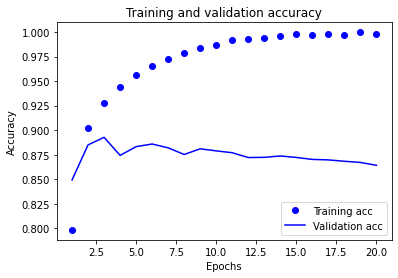

In [21]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

* **과대적합(overfitting)**
* 과대적합을 방지하기 위해서 특정 에포크 이후에 훈련을 중지할 수 있다.

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4456 - accuracy: 0.8278
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2578 - accuracy: 0.9081
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.1992 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3171 - accuracy: 0.8760


[0.317141056060791, 0.876039981842041]

### 훈련된 모델로 새로운 데이터에 대해 예측하기
* predict 메서드를 사용해서 어떤 리뷰가 긍정일 확률을 예측할 수 있다.

In [23]:
model.predict(X_test)

782/782 [==============================] - 1s 943us/step


array([[0.30138662],
       [0.9995901 ],
       [0.96025926],
       ...,
       [0.19528529],
       [0.13286085],
       [0.7829052 ]], dtype=float32)